In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Humsavar Table

In [39]:
hum = pd.read_csv("../data/interim/humsavar_clean_201711.csv.gz", sep=",")
hum.columns = hum.columns.str.replace(" ", "_")

In [40]:
#Correspondencia hecha por Santi
AMINO_CODE = {"Ala": "A",\
              "Arg": "R",\
              "Asn": "N",\
              "Asp": "D",\
              "Cys": "C",\
              "Gln": "Q",\
              "Glu": "E",\
              "Gly": "G",\
              "His": "H",\
              "Ile": "I",\
              "Leu": "L",\
              "Lys": "K",\
              "Met": "M",\
              "Phe": "F",\
              "Pro": "P",\
              "Ser": "S",\
              "Thr": "T",\
              "Trp": "W",\
              "Tyr": "Y",\
              "Val": "V",\
              "Sec": "U"
             }

In [41]:
hum.columns

Index(['Main_gene_name', 'Swiss_Prot_AC', 'FTId', 'AA_Change',
       'Type_of_variant', 'dbSNP', 'Disease_Name'],
      dtype='object')

In [42]:
df = pd.DataFrame(data=(hum["AA_Change"].str[2:].str.split(r"([0-9]+)")).tolist(), columns=["C1", "C2", "C3"])
df["C1"] = df.C1.map(AMINO_CODE)
df["C3"] = df.C3.map(AMINO_CODE)
mutant = pd.Series(data=(hum["Swiss_Prot_AC"] + "-"+ df.C2 + "-" + df.C1 + "-" + df.C3).tolist(), name="MUTANT")
# mutant = pd.Series(data=(df.C1 + df.C2 + df.C3).tolist(), name="MUTANT")

In [43]:
hum_final = pd.concat([hum, mutant, df], 1)[["MUTANT", "Swiss_Prot_AC", "C2", "C1", "C3","dbSNP", "Type_of_variant"]]
hum_final.rename(columns={"C1": "WildType", "C3": "Mut", "Swiss_Prot_AC": "UID", "C2": "Pos"}, inplace=True)
# hum_final = pd.concat([hum, mutant], 1)[["FTId", "MUTANT"]]

In [44]:
hum_final.head()

,MUTANT,UID,Pos,WildType,Mut,dbSNP,Type_of_variant
0,P04217-52-H-R,P04217,52,H,R,rs893184,Polymorphism
1,P04217-395-H-R,P04217,395,H,R,rs2241788,Polymorphism
2,Q9NQ94-555-V-M,Q9NQ94,555,V,M,rs9073,Polymorphism
3,Q9NQ94-558-A-S,Q9NQ94,558,A,S,rs11817448,Polymorphism
4,A8K2U0-207-G-R,A8K2U0,207,G,R,rs11047499,Polymorphism


In [45]:
hum_final.shape

(76730, 7)

In [46]:
hum_final.drop_duplicates("MUTANT", inplace=True)
# hum_final.drop_duplicates("dbSNP", inplace=True)
hum_final.rename(columns={"Type_of_variant": "TYPE"}, inplace=True)

In [47]:
hum_final.head(3)

,MUTANT,UID,Pos,WildType,Mut,dbSNP,TYPE
0,P04217-52-H-R,P04217,52,H,R,rs893184,Polymorphism
1,P04217-395-H-R,P04217,395,H,R,rs2241788,Polymorphism
2,Q9NQ94-555-V-M,Q9NQ94,555,V,M,rs9073,Polymorphism


In [11]:
hum_final[hum_final.dbSNP.duplicated(keep=False) & ~hum_final.dbSNP.isnull()]

,MUTANT,UID,Pos,WildType,Mut,dbSNP,TYPE
97,Q86UK0-459-S-T,Q86UK0,459,S,T,rs7560008,Polymorphism
104,Q86UK0-777-S-T,Q86UK0,777,S,T,rs7560008,Polymorphism
145,O95477-590-W-S,O95477,590,W,S,rs137854496,Disease
191,O95477-590-W-L,O95477,590,W,L,rs137854496,Disease
231,P78363-96-N-D,P78363,96,N,D,rs61748529,Disease
232,P78363-96-N-H,P78363,96,N,H,rs61748529,Disease
249,P78363-572-R-P,P78363,572,R,P,rs61748559,Disease
250,P78363-572-R-Q,P78363,572,R,Q,rs61748559,Disease
332,P78363-2077-R-W,P78363,2077,R,W,rs61750645,Disease
353,P78363-68-P-L,P78363,68,P,L,rs62654397,Disease


In [12]:
hum_final.to_csv("../data/interim/humsavar_full.csv.gz", index=False, compression="gzip")
# hum_final.to_csv("../data/interim/humsavar_VEST.csv.gz", index=False, compression="gzip")

In [3]:
hum_final = pd.read_csv("../data/interim/humsavar_full.csv.gz")

In [4]:
hum_final.shape

(75769, 7)

In [5]:
hum_final.TYPE.value_counts()

Polymorphism    39653
Disease         28855
Unclassified     7261
Name: TYPE, dtype: int64

In [6]:
hum_final = hum_final[~hum_final.dbSNP.isnull()]
hum_final = hum_final[hum_final.TYPE != "Unclassified"]

In [7]:
hum_final.shape

(55382, 7)

In [8]:
hum_final.TYPE.value_counts()

Polymorphism    37575
Disease         17807
Name: TYPE, dtype: int64

## SNVBox Features 

### Genomic MSA (Genomic)

In [3]:
genomic_msa = pd.read_csv("../data/external/snvbox_features/genomic_msa_features.csv").drop_duplicates()
# genomic_msa = genomic_msa.groupby(["UID", "Pos"]).mean().reset_index()

In [49]:
genomic_msa.shape

(110456, 27)

In [52]:
(genomic_msa.groupby(["UID", "Pos"]).size()).shape

(66738,)

In [50]:
(genomic_msa.groupby(["UID", "Pos"]).size() > 1).sum()

27489

In [72]:
genomic_msa.groupby(["UID", "Pos"]).size().value_counts(normalize=True)

1     0.588106
2     0.272409
3     0.082082
4     0.035437
5     0.009710
6     0.007732
8     0.001438
7     0.001139
9     0.001019
10    0.000435
12    0.000285
11    0.000090
16    0.000045
14    0.000045
18    0.000015
13    0.000015
dtype: float64

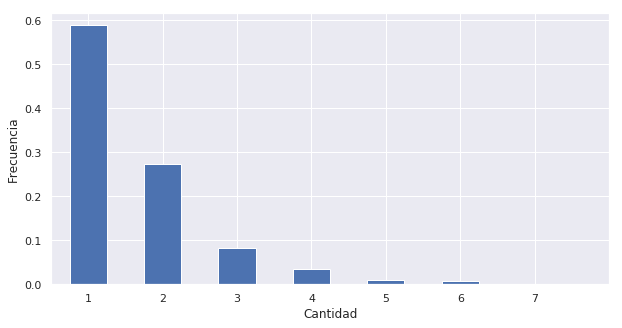

In [102]:
plt.figure(figsize=(10,5))
genomic_msa.groupby(["UID", "Pos"]).size().value_counts(normalize=True).plot.bar(rot=0)
plt.xticks(range(0,8),range(1,8))
plt.ylabel("Frecuencia")
plt.xlabel("Cantidad")
plt.xlim((-0.5,7))
plt.show()

In [6]:
genomic_msa

,UID,Pos,Entropy,Rel_Entropy,PHC_A,PHC_C,PHC_D,PHC_E,PHC_F,PHC_G,...,PHC_P,PHC_Q,PHC_R,PHC_S,PHC_T,PHC_V,PHC_W,PHC_Y,PHC_sum,PHC_squaresum
0,A0AV02,181,0.274859,4.333985,9.458330,9.458330,9.458330,9.458330,9.458330,9.458330,...,9.458330,9.458330,-0.036526,9.458330,9.458330,9.458330,9.458330,9.458330,165.089064,1539.604772
1,A0AV02,266,0.977345,2.679757,-1.116597,-1.116597,-1.116597,-1.116597,-1.116597,-1.116597,...,-0.242249,-1.116597,-1.116597,-1.116597,-1.116597,-6.047334,-1.116597,-1.116597,-24.970275,91.422043
2,A0AV02,281,0.997160,3.137730,4.695528,4.695528,4.695528,4.695528,4.695528,4.695528,...,4.695528,4.695528,4.695528,4.695528,4.695528,-3.094549,4.695528,4.695528,74.784170,372.339456
3,A0AV02,541,1.940879,2.423296,2.552332,2.552332,-2.255023,2.552332,2.552332,-0.679145,...,2.552332,2.552332,-4.070130,-2.255023,2.552332,2.552332,-2.255023,2.552332,16.050430,115.361522
4,A0AV02,664,0.982960,3.626201,8.510360,8.510360,8.510360,8.510360,8.510360,8.510360,...,4.062527,2.169600,-0.269616,8.510360,8.510360,8.510360,8.510360,8.510360,143.584869,1188.661700


In [4]:
genomic_msa.head()

,UID,Pos,Entropy,Rel_Entropy,PHC_A,PHC_C,PHC_D,PHC_E,PHC_F,PHC_G,...,PHC_P,PHC_Q,PHC_R,PHC_S,PHC_T,PHC_V,PHC_W,PHC_Y,PHC_sum,PHC_squaresum
0,A0AV02,181,0.274859,4.333985,9.458330,9.458330,9.458330,9.458330,9.458330,9.458330,...,9.458330,9.458330,-0.036526,9.458330,9.458330,9.458330,9.458330,9.458330,165.089064,1539.604772
1,A0AV02,266,0.977345,2.679757,-1.116597,-1.116597,-1.116597,-1.116597,-1.116597,-1.116597,...,-0.242249,-1.116597,-1.116597,-1.116597,-1.116597,-6.047334,-1.116597,-1.116597,-24.970275,91.422043
2,A0AV02,281,0.997160,3.137730,4.695528,4.695528,4.695528,4.695528,4.695528,4.695528,...,4.695528,4.695528,4.695528,4.695528,4.695528,-3.094549,4.695528,4.695528,74.784170,372.339456
3,A0AV02,541,1.940879,2.423296,2.552332,2.552332,-2.255023,2.552332,2.552332,-0.679145,...,2.552332,2.552332,-4.070130,-2.255023,2.552332,2.552332,-2.255023,2.552332,16.050430,115.361522
4,A0AV02,664,0.982960,3.626201,8.510360,8.510360,8.510360,8.510360,8.510360,8.510360,...,4.062527,2.169600,-0.269616,8.510360,8.510360,8.510360,8.510360,8.510360,143.584869,1188.661700


In [16]:
hum_final = hum_final.merge(genomic_msa, on=['UID', 'Pos'], how='left')

### Exon Features (Genomic)

In [53]:
exon_features = pd.read_csv("../data/external/snvbox_features/exon_features.csv", delimiter="\t").drop_duplicates()
exon_features = exon_features.rename(columns={"rsid": "dbSNP"})
# exon_features = exon_features.groupby("dbSNP").mean()

In [57]:
exon_features.groupby("dbSNP").size().shape

(55467,)

In [59]:
(exon_features.groupby("dbSNP").size() > 1).sum()

18854

In [10]:
exon_features.head()

,dbSNP,Cons,snp_den,hapmap_snp_den
0,rs1800433,0.709708,0.045198,0.00565
1,rs669,0.709708,0.045198,0.00565
2,rs3180392,0.648678,0.034934,0.00000
3,rs1800434,0.541717,0.017857,0.00000
4,rs226405,0.635459,0.018519,0.00000


In [55]:
hum_final = hum_final.merge(exon_features, left_on="dbSNP", right_index=True, how='left')

In [56]:
hum_final.shape

(55382, 10)

## Phylogenetic Features (Genomic)

In [57]:
hum_final.head()

,MUTANT,UID,Pos,WildType,Mut,dbSNP,TYPE,Cons,snp_den,hapmap_snp_den
0,P04217-52-H-R,P04217,52,H,R,rs893184,Polymorphism,0.551206,0.059259,0.000000
1,P04217-395-H-R,P04217,395,H,R,rs2241788,Polymorphism,0.517549,0.021277,0.000000
2,Q9NQ94-555-V-M,Q9NQ94,555,V,M,rs9073,Polymorphism,0.621177,0.034152,0.000033
3,Q9NQ94-558-A-S,Q9NQ94,558,A,S,rs11817448,Polymorphism,0.621177,0.034152,0.000033
4,A8K2U0-207-G-R,A8K2U0,207,G,R,rs11047499,Polymorphism,0.782358,0.031250,0.000000


In [58]:
phyloP46way = pd.read_csv("../data/interim/phyloP46way.csv").groupby("dbSNP").mean()
hum_final = hum_final.merge(phyloP46way,left_on="dbSNP", right_index=True, how="left")

phastCons46way = pd.read_csv("../data/interim/phastCons46way.csv").groupby("dbSNP").mean()
hum_final = hum_final.merge(phastCons46way,left_on="dbSNP", right_index=True, how="left")

In [59]:
hum_final.shape

(55382, 12)

## Genomic Func Classes

In [60]:
variables = ["name", "intron", "missense", "near-gene", "ncRNA", "coding-synon", "untranslated", "nonsense", "splice", "stop-loss"]
dummy = pd.read_csv("../data/interim/dbsnp150_humsavar_funcDummie.tsv", sep="\t")
dummy = dummy[variables].rename(columns={"name":"dbSNP"}).drop_duplicates(subset="dbSNP")
hum_final = hum_final.merge(dummy, on="dbSNP", how="left")

In [61]:
dummy.columns

Index(['dbSNP', 'intron', 'missense', 'near-gene', 'ncRNA', 'coding-synon',
       'untranslated', 'nonsense', 'splice', 'stop-loss'],
      dtype='object')

In [62]:
dummy.head()

,dbSNP,intron,missense,near-gene,ncRNA,coding-synon,untranslated,nonsense,splice,stop-loss
0,rs893184,1,1,0,0,0,0,0,0,0
1,rs2241788,0,1,1,0,0,0,0,0,0
2,rs9073,0,1,0,0,0,0,0,0,0
3,rs11817448,0,1,0,0,0,0,0,0,0
4,rs11047499,0,1,0,0,0,0,0,0,0


## Create Train Test Sets

In [63]:
hum_final.columns = hum_final.columns.str.upper()

In [64]:
hum_final.columns

Index(['MUTANT', 'UID', 'POS', 'WILDTYPE', 'MUT', 'DBSNP', 'TYPE', 'CONS',
       'SNP_DEN', 'HAPMAP_SNP_DEN', 'PHYLOP46WAY', 'PHASTCONS46WAY', 'INTRON',
       'MISSENSE', 'NEAR-GENE', 'NCRNA', 'CODING-SYNON', 'UNTRANSLATED',
       'NONSENSE', 'SPLICE', 'STOP-LOSS'],
      dtype='object')

In [65]:
hum_final.TYPE.value_counts()

Polymorphism    37575
Disease         17807
Name: TYPE, dtype: int64

In [66]:
hum_final.replace([np.inf,-np.inf], np.nan, inplace=True)
hum_final.to_csv("../data/processed/genomic/humsavar_full_gt.csv.gz", index=False, compression="gzip")

In [67]:
hum_final.shape

(55382, 21)

In [68]:
hum_final.columns.shape

(21,)

In [69]:
hum_final = pd.read_csv("../data/processed/genomic/humsavar_full_gt.csv.gz")

In [70]:
hum_final.shape

(55382, 21)

In [71]:
hum_final.isnull().sum()

MUTANT               0
UID                  0
POS                  0
WILDTYPE             0
MUT                  0
DBSNP                0
TYPE                 0
CONS              1056
SNP_DEN           1056
HAPMAP_SNP_DEN    1056
PHYLOP46WAY        993
PHASTCONS46WAY     993
INTRON             533
MISSENSE           533
NEAR-GENE          533
NCRNA              533
CODING-SYNON       533
UNTRANSLATED       533
NONSENSE           533
SPLICE             533
STOP-LOSS          533
dtype: int64

In [72]:
hum_final.drop(["UID", "POS","DBSNP", "WILDTYPE", "MUT"], axis=1, inplace=True)

dataset = hum_final.set_index("MUTANT")
unclassified_index = dataset[dataset.TYPE == "Unclassified"].index
dataset_disease_index = dataset[dataset.TYPE == "Disease"].index
dataset_poly_index = dataset[dataset.TYPE == "Polymorphism"].index

In [73]:
dataset.to_csv("../data/processed/genomic/dataset.csv.gz", index=True, compression="gzip")

In [74]:
hum_final.describe()

,CONS,SNP_DEN,HAPMAP_SNP_DEN,PHYLOP46WAY,PHASTCONS46WAY,INTRON,MISSENSE,NEAR-GENE,NCRNA,CODING-SYNON,UNTRANSLATED,NONSENSE,SPLICE,STOP-LOSS
count,54326.000000,54326.000000,54326.000000,54389.000000,54389.000000,54849.000000,54849.000000,54849.000000,54849.000000,54849.000000,54849.000000,54849.000000,54849.000000,54849.000000
mean,0.652634,0.064620,0.000143,2.158182,0.671734,0.136101,0.990684,0.060730,0.174114,0.020092,0.053547,0.005397,0.000510,0.000055
std,0.086864,0.099475,0.000994,2.287684,0.437809,0.342899,0.096072,0.238837,0.379211,0.140315,0.225124,0.073264,0.022589,0.007396
min,0.144895,0.000000,0.000000,-8.217000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.587777,0.029703,0.000000,0.287000,0.058000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.656068,0.043860,0.000000,1.811000,0.995000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.719510,0.064370,0.000000,4.229000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.897386,1.042402,0.039147,6.424000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
hum_final.shape

(350384, 7)

In [66]:
hum_final.TYPE.value_counts()

Polymorphism    39653
Disease         28855
Unclassified     7261
Name: TYPE, dtype: int64

### Description

In [4]:
dataset = pd.read_csv("../data/processed/genomic/dataset.csv.gz", index_col="MUTANT")

In [12]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

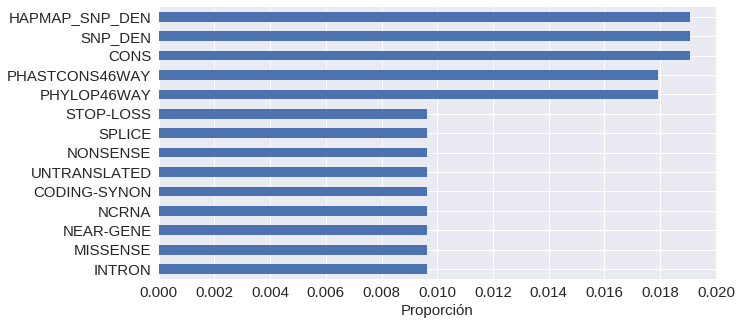

In [23]:
with_type = dataset.drop("TYPE", 1)

# cat_vars = ['INTRON','MISSENSE', 'NEAR-GENE', 'NCRNA', 'CODING-SYNON', 'UNTRANSLATED',
#             'NONSENSE', 'SPLICE', 'STOP-LOSS']

# cont_vars = genomic_dataset.columns.drop(cat_vars + ["TYPE"], 1).tolist()


# dataset.columns.drop(cat_vars, 1).tolist()
nulcount = (with_type.isnull().sum(axis=0) / with_type.shape[0]).sort_values(ascending=True)
plt.figure(figsize=(10,5))
# plt.title("Cantidad de variantes con valor nulo")
plt.yticks(size=15)
plt.xticks(np.arange(0, 0.1, 0.002), size=15)

plt.xlabel("Proporción", size=15)
ax = nulcount.plot(kind="barh")

plt.savefig("/home/marlan/Desktop/proporcion_nulos_genomic.pdf", bbox_inches='tight')

### Multiple Train Tests

In [ ]:
for i in range(20):
    train = pd.concat([
        dataset.loc[dataset_disease_index].sample(n=25000, random_state=i),
        dataset.loc[dataset_poly_index].sample(n=25000, random_state=i)
    ]).sample(frac=1)
    
    test = pd.concat([
        dataset.loc[dataset_disease_index.difference(train.index)].sample(n=3855, random_state=i),
        dataset.loc[dataset_poly_index.difference(train.index)].sample(n=14653, random_state=i)
    ]).sample(frac=1)
    train.to_csv("../data/processed/3/train_test_sets/train_{}.csv".format(i), index=True, index_label="MUTANT")
    test.to_csv("../data/processed/3/train_test_sets/test_{}.csv".format(i), index=True, index_label="MUTANT")